## Assignment 2 - Clustering

## Learning Outcomes

In this assignment, you will do the following:

* Explore a dataset and carry out clustering using k-means algorithm

* Identify the optimum number of clusters for a given dataset



## Problem Description

In this assignment, you will study the electricity demand from clients in Portugal, during 2013 and 2014. You have been provided with the data file, which you should download when you download this assignment file.

The data$^1$ available contains 370 time series, corresponding to the electric demand$^2$ for 370 clients, between 2011 and 2014. 

In this guided exercise, you will use clustering techniques to understand the typical usage behaviour during 2013-2014.

Both these datasets are publicly available, and can be used to carry out experiments. Their source is below:

 1. Data:
https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014#

 2. Electric Demand:
http://www.think-energy.net/KWvsKWH.htm

We will start by exploring the data set and continue on to the assignment.  Consider this as a working notebook, you will add your work to the same notebook.

In this assignment we will use the sklearn package for k-means.  Please refer here for the documentation https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

The sklearn package for k-means is one of the many clustering algorithms found in the module "sklearn.cluster".  These come with a variety of functions that you can call by importing the package.

For example 
    
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.cluster import KMeans



## Data Preparation

Start by downloading the data to a local directory and modify the "pathToFile" and "fileName" variables, if needed. The data file has been provided with this assignment. It is also available at the links provided above.

In [1]:
# Thomas Tang

import pandas as pd

# method 1 (Delina's)
#chunk_size = 100000  # Define the size of each chunk
#file_path = r"./LD2011_2014.txt"
#data = pd.DataFrame()
#// Read the file in chunks
#for chunk in pd.read_csv(file_path, chunksize=chunk_size, delimiter=';', error_bad_lines=False):
#    data = pd.concat([data, chunk])

# method 2 (me)
#pathToFile = r"C:\\path\\to\\file\\"        # r or R, means raw data string
#pathToFile = r"C:\\Users\\<your username>\\Downloads\\"
pathToFile = "./"
fileName = 'LD2011_2014.txt'

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42)

In [3]:
# Replace "," by ".", otherwise the numbers will be in the form 2,3445 instead of 2.3445
import fileinput

#with fileinput.FileInput(file_path, inplace=True, backup='.bak') as file:   #method 1
with fileinput.FileInput(pathToFile+fileName, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(",", "."), end='')

In [4]:
# Create dataframe
import pandas as pd
data = pd.read_csv(pathToFile+fileName, sep=";", index_col=0)

### Quick data inspection

In [5]:
data.head(5)

MT_001  MT_002  MT_003  MT_004  MT_005  MT_006  MT_007  \
2011-01-01 00:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                     MT_008  MT_009  MT_010  ...  MT_361  MT_362  MT_363  \
2011-01-01 00:15:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 01:15:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   

                     MT_364  MT_365  MT_366  MT_367  MT_368  MT_369  MT_370  
2011-01-01 00:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2011-01-01 00:30:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2011-01-01 00:45:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2011-01-01 01:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2011-01-01 01:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 370 columns]

In [6]:
data.tail(5)

MT_001     MT_002    MT_003      MT_004     MT_005  \
2014-12-31 23:00:00  2.538071  22.048364  1.737619  150.406504  85.365854   
2014-12-31 23:15:00  2.538071  21.337127  1.737619  166.666667  81.707317   
2014-12-31 23:30:00  2.538071  20.625889  1.737619  162.601626  82.926829   
2014-12-31 23:45:00  1.269036  21.337127  1.737619  166.666667  85.365854   
2015-01-01 00:00:00  2.538071  19.914651  1.737619  178.861789  84.146341   

                         MT_006     MT_007      MT_008     MT_009     MT_010  \
2014-12-31 23:00:00  303.571429  11.305822  282.828283  68.181818  72.043011   
2014-12-31 23:15:00  324.404762  11.305822  252.525253  64.685315  72.043011   
2014-12-31 23:30:00  318.452381  10.175240  242.424242  61.188811  74.193548   
2014-12-31 23:45:00  285.714286  10.175240  225.589226  64.685315  72.043011   
2015-01-01 00:00:00  279.761905  10.175240  249.158249  62.937063  69.892473   

                     ...      MT_361   MT_362       MT_363       MT_364  \
2014-12-31 23:00:00  ...  276.945039  28200.0  1616.033755  1363.636364   
2014-12-31 23:15:00  ...  279.800143  28300.0  1569.620253  1340.909091   
2014-12-31 23:30:00  ...  284.796574  27800.0  1556.962025  1318.181818   
2014-12-31 23:45:00  ...  246.252677  28000.0  1443.037975   909.090909   
2015-01-01 00:00:00  ...  188.436831  27800.0  1409.282700   954.545455   

                        MT_365    MT_366      MT_367      MT_368      MT_369  \
2014-12-31 23:00:00  29.986962  5.851375  697.102722  176.961603  651.026393   
2014-12-31 23:15:00  29.986962  9.947338  671.641791  168.614357  669.354839   
2014-12-31 23:30:00  27.379400  9.362200  670.763828  153.589316  670.087977   
2014-12-31 23:45:00  26.075619  4.095963  664.618086  146.911519  646.627566   
2015-01-01 00:00:00  27.379400  4.095963  628.621598  131.886477  673.020528   

                          MT_370  
2014-12-31 23:00:00  7621.621622  
2014-12-31 23:15:00  6702.702703  
2014-12-31 23:30:00  6864.864865  
2014-12-31 23:45:00  6540.540541  
2015-01-01 00:00:00  7135.135135  

[5 rows x 370 columns]

In [7]:
data.shape

(140256, 370)

#### As it can be seen, the dataframe contains a row for each interval of 15 minutes between Jan 1, 2011 to Dec 31 2014. There are 370 columns corresponding 370 clients. The dataframe is indexed by the timestamp.

Since the frequency is 15 minutes, each day provides $24\times 4 = 96$ datapoints, which multiplied by 365 days and 4 years (plus 1 day in Feb 29, 2012) gives: $96 \times 365 \times 4 + 96 = 140256$, as observed in data.shape

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0+ MB


In [9]:
data.describe()

MT_001         MT_002         MT_003         MT_004  \
count  140256.000000  140256.000000  140256.000000  140256.000000   
mean        3.970785      20.768480       2.918308      82.184490   
std         5.983965      13.272415      11.014456      58.248392   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.844950       0.000000      36.585366   
50%         1.269036      24.893314       1.737619      87.398374   
75%         2.538071      29.871977       1.737619     115.853659   
max        48.223350     115.220484     151.172893     321.138211   

              MT_005         MT_006         MT_007         MT_008  \
count  140256.000000  140256.000000  140256.000000  140256.000000   
mean       37.240309     141.227385       4.521338     191.401476   
std        26.461327      98.439984       6.485684     121.981187   
min         0.000000       0.000000       0.000000       0.000000   
25%        15.853659      71.428571       0.565291     111.111111   
50%        39.024390     157.738095       2.826456     222.222222   
75%        54.878049     205.357143       4.522329     279.461279   
max       150.000000     535.714286      44.657999     552.188552   

              MT_009         MT_010  ...         MT_361         MT_362  \
count  140256.000000  140256.000000  ...  140256.000000  140256.000000   
mean       39.975354      42.205152  ...     218.213701   37607.987537   
std        29.814595      33.401251  ...     204.833532   38691.954832   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%        13.986014       9.677419  ...       5.710207       0.000000   
50%        40.209790      40.860215  ...     131.334761   24100.000000   
75%        57.692308      61.290323  ...     403.283369   54800.000000   
max       157.342657     198.924731  ...     852.962170  192800.000000   

              MT_363         MT_364         MT_365         MT_366  \
count  140256.000000  140256.000000  140256.000000  140256.000000   
mean     1887.427366    2940.031734      65.413150       9.269709   
std      1801.486488    2732.251967      65.007818      10.016782   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000      13.037810       0.000000   
50%      1050.632911    2136.363636      31.290743       7.021650   
75%      3312.236287    5363.636364     108.213820      11.702750   
max      7751.054852   12386.363636     335.071708      60.269163   

              MT_367         MT_368         MT_369         MT_370  
count  140256.000000  140256.000000  140256.000000  140256.000000  
mean      424.262904      94.704717     625.251734    8722.355145  
std       274.337122      80.297301     380.656042    9195.155777  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000      30.050083      83.944282       0.000000  
50%       525.899912      76.794658     758.064516       0.000000  
75%       627.743635     151.919866     875.366569   17783.783784  
max      1138.718174     362.270451    1549.120235   30918.918919  

[8 rows x 370 columns]

### Plot the first 2 days of 2012 for the first 2 clients

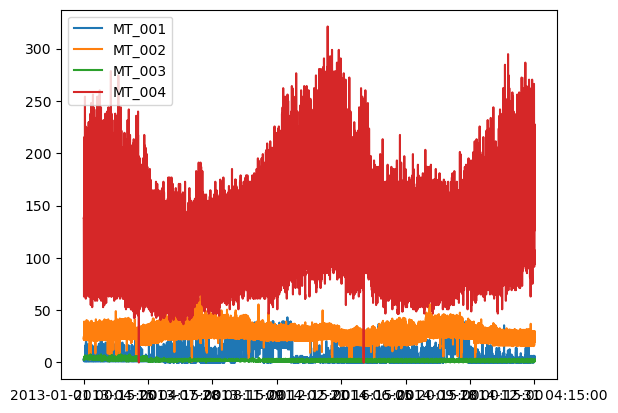

In [10]:
#data_example = data.loc['2012-01-01 00:15:00':'2012-01-03 00:00:00'][['MT_001','MT_002']]
data_example = data.loc['2013-01-01 00:15:00':'2015-01-01 00:00:00'][['MT_001','MT_002','MT_003','MT_004']]
data_example.plot()

plt.show()

#### We  note that the main difference between the curves is the level (also seen on the means in df.describe()).  We know we will have to somehow normalize the curves, in order for the clustering technique to capture the behaviour of the consumption throughout the day.

### Data for the analysis

We focus on 2013 and 2014 because these are the years with low number of clients having zero demand

In [11]:
data2011 = data.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = data.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = data.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = data.loc['2014-01-01 00:15:00':'2015-01-01 00:00:00']

In [12]:
# Check number of days
print(data2011.shape[0]/96)
print(data2012.shape[0]/96)
print(data2013.shape[0]/96)
print(data2014.shape[0]/96)

365.0
366.0
365.0
365.0


In [13]:
# See number of clients with 0 demand per year
print(sum(data2011.mean()==0))
print(sum(data2012.mean()==0))
print(sum(data2013.mean()==0))
print(sum(data2014.mean()==0))

210
37
21
1


In [14]:
print (data2011.columns)

Index(['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006', 'MT_007',
       'MT_008', 'MT_009', 'MT_010',
       ...
       'MT_361', 'MT_362', 'MT_363', 'MT_364', 'MT_365', 'MT_366', 'MT_367',
       'MT_368', 'MT_369', 'MT_370'],
      dtype='object', length=370)


In [15]:
clients = data2011.columns
clients_no_demand = clients[data2013.mean()==0] # clients with 0 demand
data_13_14 = data2013.append(data2014) # appending 2013 and 2014
data_13_14 = data_13_14.drop(clients_no_demand, axis=1) # drop clients with 0 demand
print(data_13_14.shape)
print(sum(data_13_14.mean()==0)) # check that there are no clients with 0 demand

C:\Users\ttang\AppData\Local\Temp\ipykernel_16916\2042128106.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_13_14 = data2013.append(data2014) # appending 2013 and 2014


(70080, 349)
0


## Getting average curves per client

In [16]:
data = data_13_14.copy() # weekdays weekends, data2011, data2012, data2013, data2014

In [17]:
data['hour'] = data.index.map(lambda x: x[11:])
data['hour']

2013-01-01 00:15:00    00:15:00
2013-01-01 00:30:00    00:30:00
2013-01-01 00:45:00    00:45:00
2013-01-01 01:00:00    01:00:00
2013-01-01 01:15:00    01:15:00
                         ...   
2014-12-31 23:00:00    23:00:00
2014-12-31 23:15:00    23:15:00
2014-12-31 23:30:00    23:30:00
2014-12-31 23:45:00    23:45:00
2015-01-01 00:00:00    00:00:00
Name: hour, Length: 70080, dtype: object

In [18]:
data.head(5)

MT_001     MT_002    MT_003      MT_004     MT_005  \
2013-01-01 00:15:00  2.538071  22.759602  2.606429  138.211382  63.414634   
2013-01-01 00:30:00  1.269036  22.759602  2.606429  138.211382  63.414634   
2013-01-01 00:45:00  2.538071  22.759602  2.606429  134.146341  60.975610   
2013-01-01 01:00:00  1.269036  23.470839  2.606429  130.081301  56.097561   
2013-01-01 01:15:00  3.807107  23.470839  2.606429  130.081301  58.536585   

                         MT_006    MT_007      MT_008     MT_009     MT_010  \
2013-01-01 00:15:00  255.952381  4.522329  239.057239  57.692308  78.494624   
2013-01-01 00:30:00  264.880952  5.652911  228.956229  57.692308  76.344086   
2013-01-01 00:45:00  250.000000  5.652911  239.057239  54.195804  76.344086   
2013-01-01 01:00:00  226.190476  6.218202  249.158249  50.699301  75.268817   
2013-01-01 01:15:00  229.166667  6.783493  239.057239  57.692308  74.193548   

                     ...   MT_362      MT_363       MT_364     MT_365  \
2013-01-01 00:15:00  ...  22300.0  886.075949  1000.000000  16.949153   
2013-01-01 00:30:00  ...  21000.0  864.978903   909.090909  18.252934   
2013-01-01 00:45:00  ...  18200.0  860.759494   840.909091  16.949153   
2013-01-01 01:00:00  ...  15800.0  860.759494   840.909091  16.949153   
2013-01-01 01:15:00  ...  15000.0  793.248945   818.181818  16.949153   

                       MT_366      MT_367     MT_368      MT_369       MT_370  \
2013-01-01 00:15:00  6.436513  616.330114  76.794658  731.671554  8086.486486   
2013-01-01 00:30:00  3.510825  564.530290  76.794658  727.272727  8086.486486   
2013-01-01 00:45:00  5.851375  590.869183  68.447412  730.205279  7848.648649   
2013-01-01 01:00:00  4.095963  575.065847  58.430718  722.873900  7848.648649   
2013-01-01 01:15:00  4.095963  570.676032  60.100167  748.533724  7610.810811   

                         hour  
2013-01-01 00:15:00  00:15:00  
2013-01-01 00:30:00  00:30:00  
2013-01-01 00:45:00  00:45:00  
2013-01-01 01:00:00  01:00:00  
2013-01-01 01:15:00  01:15:00  

[5 rows x 350 columns]

### Getting average curves per client

In [19]:
datagrouped = data.groupby("hour")
average_curves = datagrouped.agg("mean")
#print (average_curves)
average_curves.shape 

(96, 349)

#### The dataframe average_curves contains the 349 typical weekday electric demands

#### We now divide each curve by its mean, so that all curves have mean 1

In [20]:
# OK< visualized what's going on...
print (average_curves)
print (average_curves.shape)
print (average_curves.mean())

            MT_001     MT_002    MT_003      MT_004     MT_005      MT_006  \
hour                                                                         
00:00:00  5.008344  26.045909  1.938755  130.551843  60.374206  191.136660   
00:15:00  4.917947  25.833512  1.911381  125.863125  57.586034  179.297130   
00:30:00  4.984007  24.754964  1.909001  121.566990  55.476111  171.554958   
00:45:00  4.980530  24.656560  1.899480  117.961354  53.630137  164.452870   
01:00:00  4.963146  23.665699  1.863775  111.732932  52.123288  155.850457   
...            ...        ...       ...         ...        ...         ...   
22:45:00  5.175231  26.859448  2.029206  154.276646  69.679252  241.809361   
23:00:00  5.319519  26.919854  1.973269  148.123399  68.810558  234.515656   
23:15:00  5.356025  26.839962  1.962558  141.869919  67.398931  223.434442   
23:30:00  5.225645  25.952376  1.951847  138.526005  64.767792  211.309524   
23:45:00  5.199569  26.042986  1.941135  134.580688  62.666221  

In [21]:
average_curves_norm = average_curves/(average_curves.mean())
print (average_curves_norm)

            MT_001    MT_002    MT_003    MT_004    MT_005    MT_006  \
hour                                                                   
00:00:00  0.964792  0.926674  0.991800  1.140106  1.186498  1.008914   
00:15:00  0.947378  0.919117  0.977796  1.099159  1.131703  0.946419   
00:30:00  0.960104  0.880744  0.976579  1.061641  1.090238  0.905552   
00:45:00  0.959434  0.877243  0.971708  1.030153  1.053960  0.868064   
01:00:00  0.956085  0.841989  0.953443  0.975761  1.024347  0.822656   
...            ...       ...       ...       ...       ...       ...   
22:45:00  0.996941  0.955618  1.038072  1.347294  1.369364  1.276390   
23:00:00  1.024736  0.957767  1.009456  1.293558  1.352292  1.237890   
23:15:00  1.031768  0.954925  1.003976  1.238946  1.324550  1.179398   
23:30:00  1.006652  0.923346  0.998497  1.209744  1.272842  1.115396   
23:45:00  1.001629  0.926570  0.993017  1.175290  1.231541  1.063597   

            MT_007    MT_008    MT_009    MT_010  ...    MT_361

#### Plot the first 2 and last 2 clients

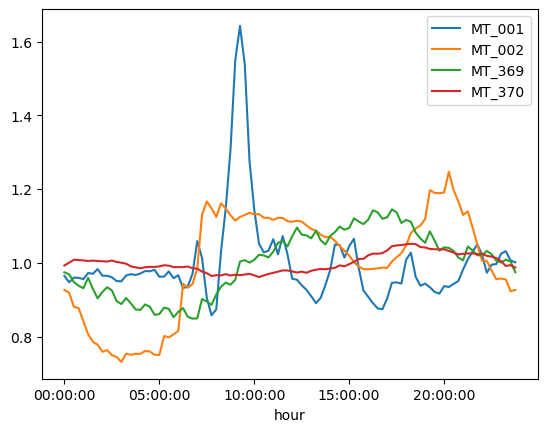

In [22]:
average_curves_norm[['MT_001','MT_002','MT_369','MT_370']].plot()
plt.show()

In [23]:
#from sklearn.pipeline import Pipeline #each pipeline can have multiple steps
#from sklearn.compose import ColumnTransformer #for selecting specific columns and transforming them with individual pipelines
#from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder #specific transformations we want to use in our pipelines

#X = average_curves_norm.copy()  # We call this normalized curve

#columns_predictors = [col for col in X.columns if col not in ["hour"]]
#columns_categorical = ["hour"]
#columns_numerical = [col for col in columns_predictors if col not in columns_categorical]

#pipeline_categorical = Pipeline([
#  ('onehot', OneHotEncoder(handle_unknown="ignore")),
#])

#pipeline_numerical = Pipeline([
#  ('scaler', MinMaxScaler(feature_range=(0,1))),
#])

#pipeline_full = ColumnTransformer([
  ##("categorical", pipeline_categorical, columns_categorical),
  #("numerical", pipeline_numerical, columns_numerical)   #,
#])

In [24]:
#pipeline_full


In [25]:
#from sklearn.model_selection import train_test_split
#TARGET = "hour"
#X = data[columns_predictors]
#y = data[TARGET]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y) #stratified sampling based on the target
#print(f"X_train.shape: {X_train.shape}")
#print(f"X_test.shape: {X_test.shape}")
#print(f"y_train.shape: {y_train.shape}")
#print(f"y_test.shape: {y_test.shape}")
#X_train[columns_numerical]

In [26]:
#pipeline_full.fit(X_train)
#X_train_transformed = pipeline_full.transform(X_train)
#X_test_transformed = pipeline_full.transform(X_test)
#print(f"X_train_transformed.shape: {X_train_transformed.shape}")
#print(f"X_test_transformed.shape: {X_test_transformed.shape}")

In [27]:
#pipeline_full.named_transformers_["numerical"].named_steps["scaler"].feature_range

In [28]:
#pipeline_full.named_transformers_["numerical"].named_steps["scaler"].get_feature_names_out() #this is the column names after one-hot encoding

In [29]:
#%%time
#from sklearn.linear_model import LogisticRegression

#model = LogisticRegression(n_jobs=-1, random_state=123)
#model.fit(X_train_transformed)
#X = X_train_transformed

In [30]:
#features = columns_numerical
#target = TARGET

## Clustering Analysis on the average normalized curves

In [31]:
X = average_curves_norm.copy()  # We call this normalized curve
print (type(X))

print (X)
print (X.shape)
#print ("")

#print(X['MT_001', "hour"].to_string(index=False))
#X = X.transpose()
#print(data)

#print (X.iloc[:, [hour]])


#X = X_train_transformed
X = np.array(X.T) # put it on the right format
print (X)
print (X.shape)

#print (X[0, 0:1])
#print (X[1])



<class 'pandas.core.frame.DataFrame'>
            MT_001    MT_002    MT_003    MT_004    MT_005    MT_006  \
hour                                                                   
00:00:00  0.964792  0.926674  0.991800  1.140106  1.186498  1.008914   
00:15:00  0.947378  0.919117  0.977796  1.099159  1.131703  0.946419   
00:30:00  0.960104  0.880744  0.976579  1.061641  1.090238  0.905552   
00:45:00  0.959434  0.877243  0.971708  1.030153  1.053960  0.868064   
01:00:00  0.956085  0.841989  0.953443  0.975761  1.024347  0.822656   
...            ...       ...       ...       ...       ...       ...   
22:45:00  0.996941  0.955618  1.038072  1.347294  1.369364  1.276390   
23:00:00  1.024736  0.957767  1.009456  1.293558  1.352292  1.237890   
23:15:00  1.031768  0.954925  1.003976  1.238946  1.324550  1.179398   
23:30:00  1.006652  0.923346  0.998497  1.209744  1.272842  1.115396   
23:45:00  1.001629  0.926570  0.993017  1.175290  1.231541  1.063597   

            MT_007    MT_

# Questions (15 marks total)

**Q1: (7 marks)**

a. Determine what a convenient number of clusters. Justify your choice.  Make use of the sklearn's package for k-means for this. You may refer to the module to figure out how to come up with the optimal number of clusters. 

b. Make a plot for each cluster, that includes:
    - The number of clients in the cluster (you can put this in the title of the plot)
    - All the curves in the cluster
    - The curve corresponding to the center of the cluster (make this curve thicker to distinguish it from the individual curves).  The center is also sometimes referred to as "centroid".
    
You have 2 separate plots for each cluster if you prefer (one for the individual curves, one for the centroid)

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

[1707.229420029634, 1175.527275423089, 865.9677208804292, 657.7201005691592, 607.9311256123674, 560.4868844735939, 483.234866141491, 392.01353855231787, 376.3730866186197]


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Within--cluster Sum of Squares')

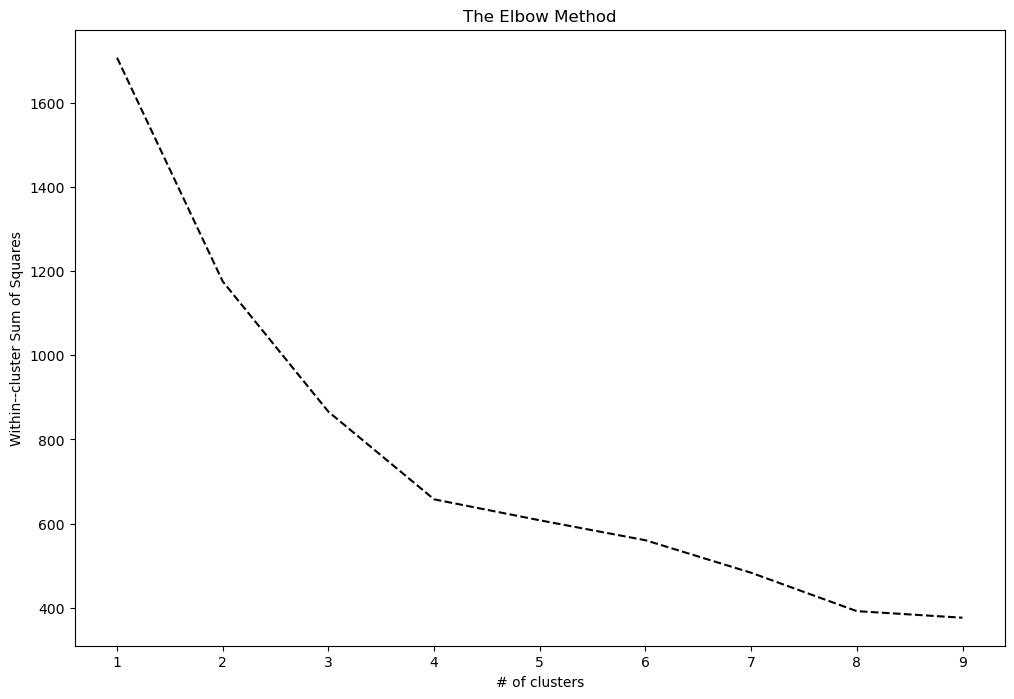

In [32]:
# ref: 
# https://www.youtube.com/watch?v=0h4yhFtoXOU
# https://www.youtube.com/watch?v=zQfEc7vA1gU
# https://www.youtube.com/watch?v=FqIGui0rwh4
# https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
   
import pandas as pd
#from sklearn.cluster import KMeans
import sklearn.cluster as cluster

from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

#with cluster sum of squares
wcss = []

K = range(1, 10) 
#K = range(1, 96)

#=========
#method 1
#=========
#for k in K:
#    km = KMeans(n_clusters = k, random_state=123, n_init="auto")
#    km = km.fit(X)
#    wcss.append(km.inertia_)  # <-----here

#====================
#method 2, class note
#====================
def getInertia(X,kmeans):
    inertia = 0
    for J in range(len(X)):
        inertia = inertia + np.linalg.norm(X[J] - kmeans.cluster_centers_[kmeans.labels_[J]])**2
    return inertia

for k in K:
    km = KMeans(n_clusters = k, random_state=123, n_init="auto")
    km = km.fit(X)
    wcss.append(getInertia(X,km))

#===============================   
#common part (for method 1 or 2)
#===============================
# display
print (wcss)

# plot
figure = plt.figure(figsize = (12,8))
plt.plot(K, wcss, 'k--')
plt.title("The Elbow Method")
plt.xlabel("# of clusters")
plt.ylabel("Within--cluster Sum of Squares")


In [33]:
# Therefore the optimum number of clusters is: 4 

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


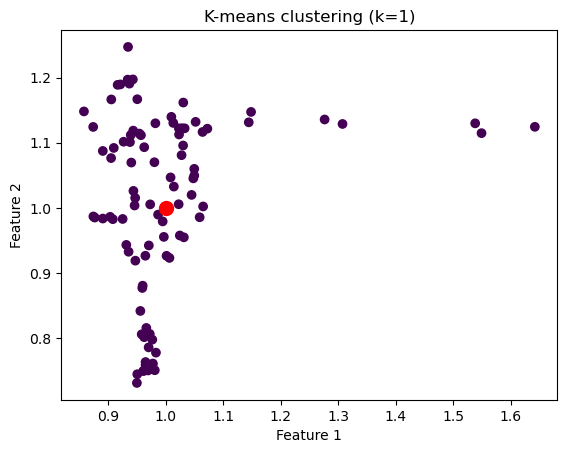

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


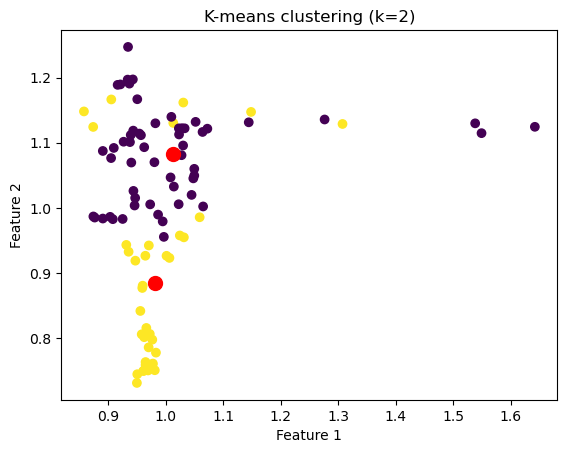

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


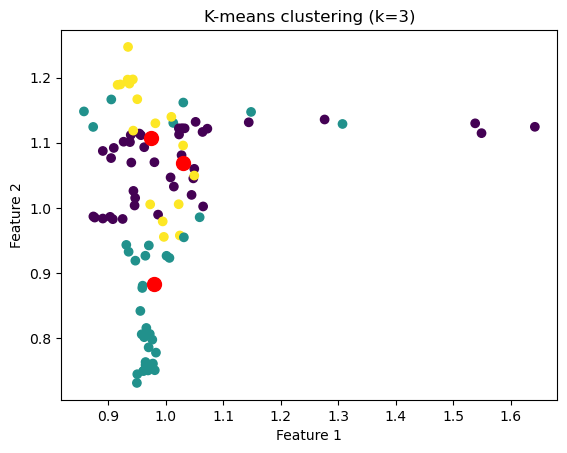

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


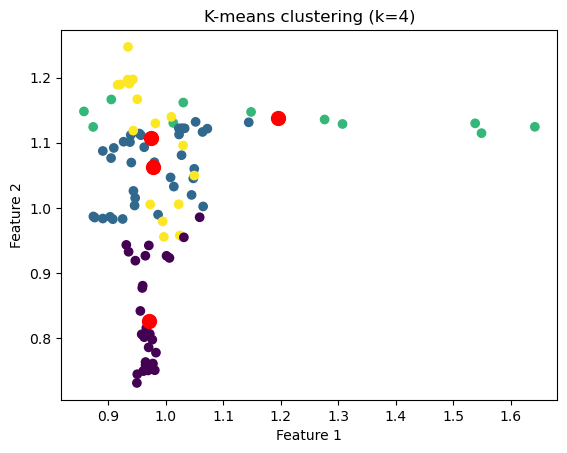

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


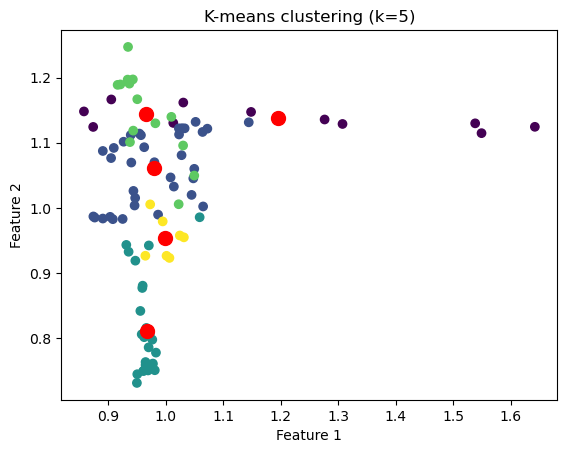

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


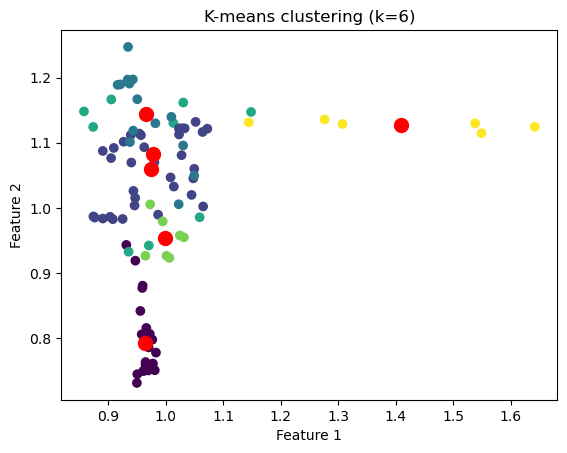

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


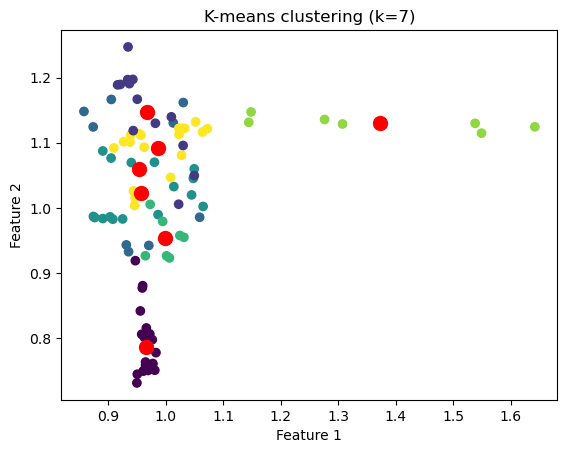

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


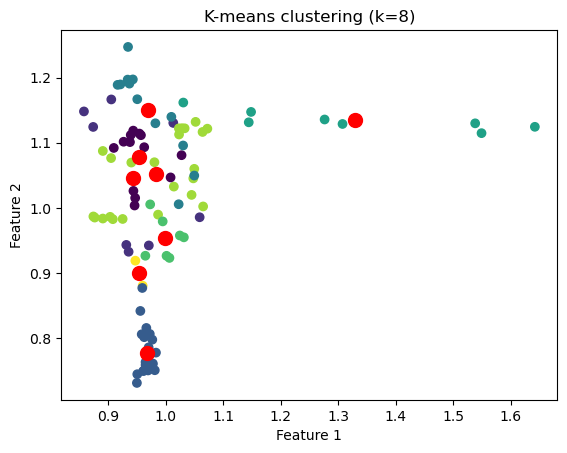

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


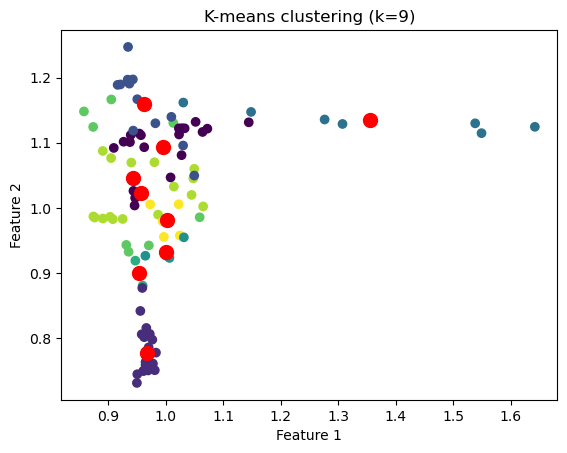

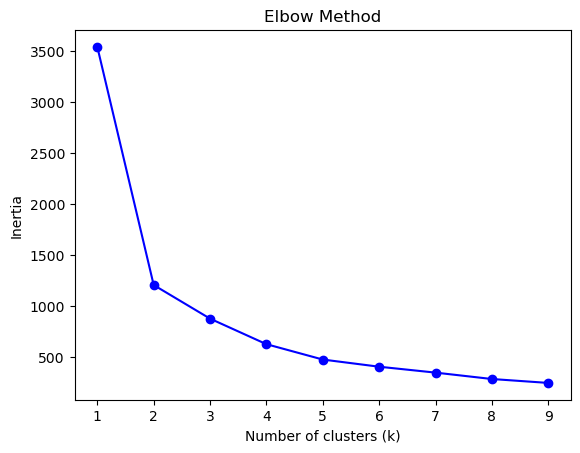

In [34]:
import matplotlib.pyplot as plt
X = np.array(X.T) # put it on the right format

# Create a range of values for k
#k_range = range(1, 96)
k_range = range(1, 10)
 
# Initialize an empty list to 
# store the inertia values for each k
inertia_values = []
 
# Fit and plot the data for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, \
                    init='k-means++', random_state=123)
    y_kmeans = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0],\
                kmeans.cluster_centers_[:, 1], \
                s=100, c='red')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
 
# Plot the inertia values for each k
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Sihouette score for k(clusters) = 2 is 0.5676594904032205


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Sihouette score for k(clusters) = 3 is 0.5009331906777231


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Sihouette score for k(clusters) = 4 is 0.4979348297764157


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Sihouette score for k(clusters) = 5 is 0.5095418328441595


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Sihouette score for k(clusters) = 6 is 0.49286485133281843


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Sihouette score for k(clusters) = 7 is 0.44791283259889436


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Sihouette score for k(clusters) = 8 is 0.45403489350197984


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Sihouette score for k(clusters) = 9 is 0.455125174697047


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3
 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1]


<Axes: >

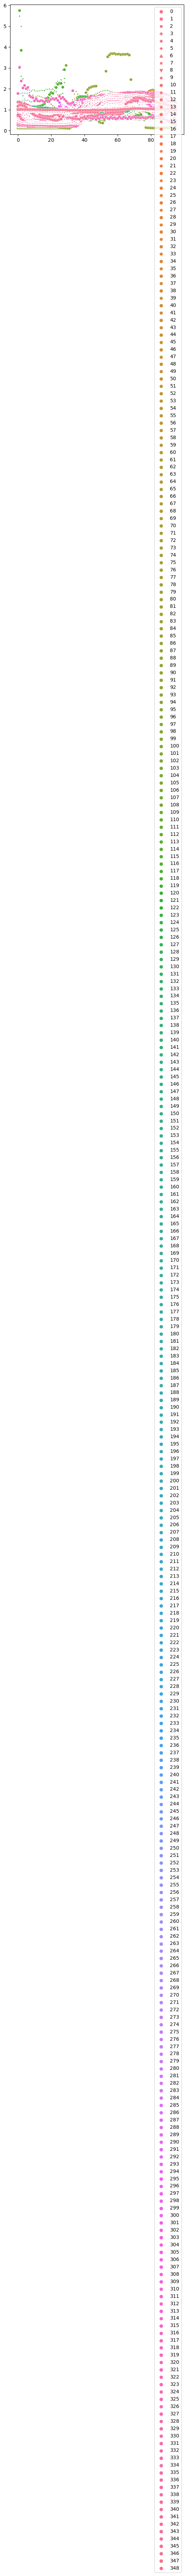

In [35]:
# Sihouette

import sklearn.metrics as metrics
import sklearn.cluster as cluster
import seaborn as sns

for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i, init="k-means++", random_state=123).fit(X).labels_
    print("Sihouette score for k(clusters) = "+str(i)+" is "
          +str(metrics.silhouette_score(X, labels, metric="euclidean", sample_size=1000, random_state=123))) #<---here
        
kmeans = cluster.KMeans(n_clusters=4, init="k-means++")
kmeans = kmeans.fit(X)

labels = kmeans.labels_
print (labels)

sns.scatterplot(data=X)


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75]
[[1.14462324 1.13139944 0.97596986 ... 0.8795542  1.00819669 0.96628419]
 [1.05219609 1.13209272 0.96622843 ... 0.8788701  1.02207277 0.96148847]
 [1.02841954 1.12235213 0.93943949 ... 0.86896865 1.02018247 0.96590752]
 ...
 [1.02774977 1.08096327 1.07764607 ... 1.55459858 1.11134422 1.0518834 ]
 [0.96278286 1.09319967 1.15740406 ... 1.53859425 1.08230042 1.05084247]
 [0.93800167 1.10106841 1.12209136 ... 1.48428033 1.066119   1.04293247]]
2 [29 30 31 32 33 34 35 36 37 38 39]
[[1.01334989 1.13046351 0.956487   ... 0.87642174 0.90215616 0.97644231]
 [0.90551821 1.16647944 0.95892235 ... 0.87631372 0.89523036 0.97197152]
 [0.85796511 1.14810751 0.96866379 ... 0.87381136 0.88628204 0.96446448]
 ...
 [1.6422564  1.1245013  1.04598642 ... 0.90553198 1.00375375 0.96677878]
 [1.53844329 1.12983956 1.01006488 ... 0.89375827 1.00742049 0.9683707 ]
 [1.27656635 1.13573245 0.97536102 .

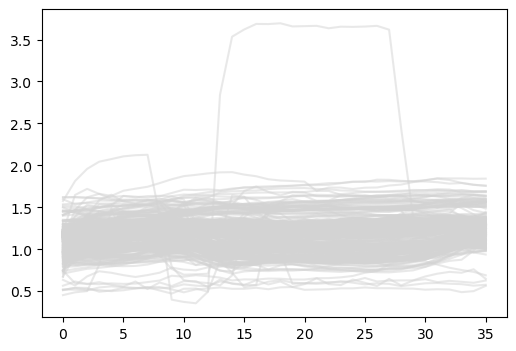

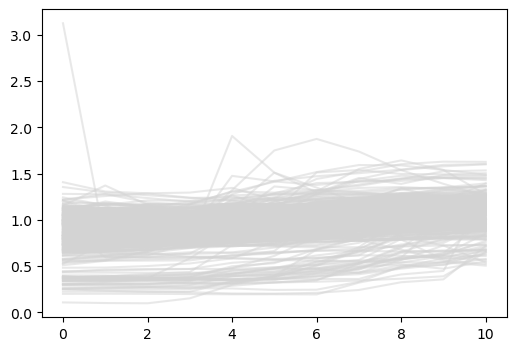

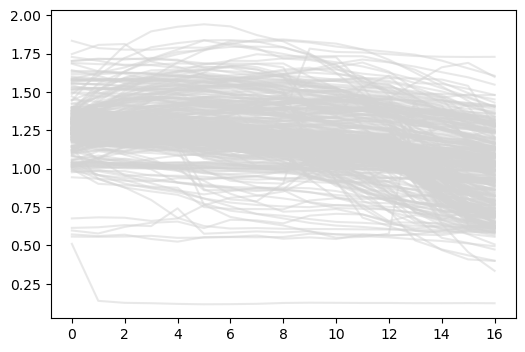

In [36]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=123, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot each cluster
K=range(1,4) #K=range(1,10)
wss= []

for k in K:
    plt.figure(figsize=(6, 4))
    
    cluster_indices = np.where(labels == k)[0]
    print(k, cluster_indices)
    
    cluster_curves = X[cluster_indices]
    print(cluster_curves)
    
    plt.plot(cluster_curves, color='lightgrey', alpha=0.5)

    #kmeans = cluster.KMeans(n_clusters=k, init="k-mean++")
    #kmeans=kmeans.fit(X)
    #wss_iter = kmeans.inertia_
    #wss.append(wss_iter)
    

In [37]:
# del later

#distortions = []
#inertias = []
#mapping1 = {}
#mapping2 = {}
#K = range(1, 10)
 
#for k in K:
    # Building and fitting the model
#    kmeanModel = KMeans(n_clusters=k).fit(X)
#    kmeanModel.fit(X)
 
#    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
#    inertias.append(kmeanModel.inertia_)
 
#    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
#    mapping2[k] = kmeanModel.inertia_

In [38]:
#del later
#for key, val in mapping1.items():
#    print(f'{key} : {val}')

In [39]:
#del later

#plt.plot(K, distortions, 'bx-')
#plt.xlabel('Values of K')
#plt.ylabel('Distortion')
#plt.title('The Elbow Method using Distortion')
#plt.show()

In [40]:
# May delete later

#https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am

##export MKL_NUM_THREADS=1
##export NUMEXPR_NUM_THREADS=1
##export OMP_NUM_THREADS=1

#from sklearn.cluster import KMeans
#import numpy as np
#X = np.array([[1, 2], [1, 4], [1, 0],
#              [10, 2], [10, 4], [10, 0]])
#kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
#kmeans.labels_

#kmeans.predict([[0, 0], [12, 3]])

#kmeans.cluster_centers_


**Q2: (8 marks)**

In this exercise you work with the daily curves of 1 single client.
First, create a list of arrays, each array containing a curve for a day. You may use X from the cells above.
    X = average_curves_norm.copy() 
The list contains 730 arrays, one for each of the days of 2013 and 2014.

a. Determine the optimal value of k ( number of clusters). This time you may also perform silhoutte analysis as stated in the module. Carrying out silhoutte analysis is left as an exercise. What do you understand about the clusters? 

b. Based on your results from your analyses of both methods, what do understand?  Interpret it perhaps with different perspectives of timelines like weeks or months.

#### The following cell generates a list of all the days in the two years 2013-2014, which is helpful to answer part (b).  The cells below are only to give you a headstart.  You may or may not use these and come up with your own interpretation.


In [41]:
client = 'MT_022'    #'MT_001'
oneClient = data_13_14[client]
X = [] # a list of arrays, each array being a normalized curve for a day
for J in range(2*365):
    X.extend([np.array(oneClient[J*96:(J+1)*96])])#/np.mean(oneClient[J*96:(J+1)*96])]) 
print (X)
print (type(X))
print (len(X))


[array([31.13325031, 28.64259029, 27.39726027, 24.90660025, 24.28393524,
       26.15193026, 26.15193026, 24.90660025, 26.77459527, 23.66127024,
       23.66127024, 21.17061021, 23.03860523, 19.30261519, 18.67995019,
       18.67995019, 19.30261519, 19.30261519, 18.67995019, 19.30261519,
       18.05728518, 18.05728518, 17.43462017, 16.81195517, 17.43462017,
       17.43462017, 17.43462017, 17.43462017, 18.67995019, 21.17061021,
       19.30261519, 20.54794521, 19.9252802 , 21.17061021, 20.54794521,
       21.79327522, 24.90660025, 31.13325031, 23.66127024, 19.30261519,
       21.79327522, 20.54794521, 13.69863014, 16.81195517, 15.56662516,
       18.05728518, 18.05728518, 16.81195517, 19.9252802 , 16.81195517,
       18.05728518, 20.54794521, 16.81195517, 18.67995019, 21.17061021,
       19.9252802 , 16.81195517, 16.18929016, 17.43462017, 18.05728518,
       18.67995019, 15.56662516, 18.05728518, 19.30261519, 18.05728518,
       15.56662516, 17.43462017, 18.05728518, 16.18929016, 19.9

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Sihouette score for k(clusters) = 2 is 0.5011374240143706


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Sihouette score for k(clusters) = 3 is 0.28219774161561906


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Sihouette score for k(clusters) = 4 is 0.2809290661743728


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Sihouette score for k(clusters) = 5 is 0.21965915775778727


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Sihouette score for k(clusters) = 6 is 0.1917986087604863


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Sihouette score for k(clusters) = 7 is 0.19097719421318593


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Sihouette score for k(clusters) = 8 is 0.18383327435065394
Sihouette score for k(clusters) = 9 is 0.18240280251128985


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[1 2 2 2 1 1 2 3 2 3 3 1 1 3 3 3 2 3 1 1 3 2 3 2 3 1 1 3 3 2 2 2 1 1 3 3 2
 3 2 1 1 3 1 3 2 2 1 1 2 2 2 3 2 1 1 2 3 3 3 2 1 1 3 2 3 3 2 1 1 3 2 2 2 2
 1 1 2 3 3 3 3 1 1 3 3 3 3 1 1 1 1 2 2 2 2 1 1 3 2 2 2 2 1 1 2 2 2 2 2 1 1
 2 2 2 1 2 1 1 2 2 1 1 1 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 2
 2 2 2 1 1 2 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 0 2 1 3 3 3 3
 3 2 1 3 3 2 3 2 2 1 3 3 2 3 2 2 1 2 3 3 3 0 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 2 2 2 2 2 2 1 2
 2 2 2 2 2 1 2 3 2 2 0 1 1 2 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2
 3 2 2 1 3 2 2 3 0 2 1 2 3 3 3 2 2 1 2 2 2 2 2 2 1 2 3 3 3 2 2 1 3 3 3 3 3
 3 1 3 3 3 3 3 2 1 3 3 3 3 3 2 1 3 3 3 3 3 2 1 2 1 1 2 2 1 1 2 1 1 3 3 1 1
 3 3 3 3 3 2 1 3 3 3 3 3 3 1 3 3 3 3 3 2 1 3 3 3 3 3 2 1 3 3 3 3 3 2 1 3 3
 3 3 3 2 1 3 3 3 3 3 2 1 0 3 3 0 3 1 1 0 1 0 0 2 2 1 0 0 0 0 2 1 1 0 2 2 2
 0 1 1 0 0 0 0 0 2 1 0 0 0 0 0 1 1 0 0 0 0 0 2 1 0 2 0 0 0 1 1 1 0 0 0 1 1
 1 0 0 0 1 1 1 1 0 2 2 0 

<Axes: >

C:\Users\ttang\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\ttang\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


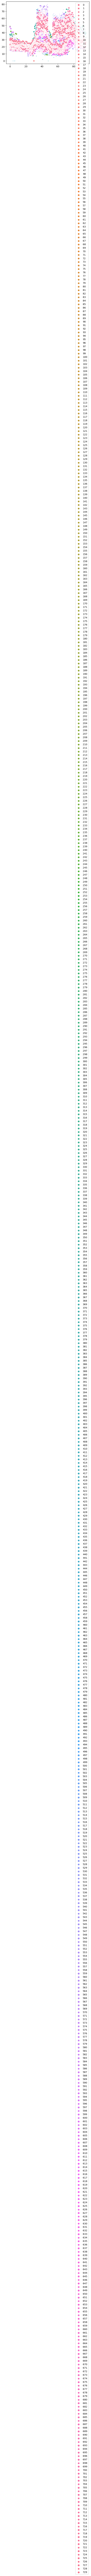

In [42]:
# Sihouette 1.1

import sklearn.metrics as metrics
import sklearn.cluster as cluster
import seaborn as sns

for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i, init="k-means++", random_state=123).fit(X).labels_
    print("Sihouette score for k(clusters) = "+str(i)+" is "
          +str(metrics.silhouette_score(X, labels, metric="euclidean", sample_size=1000, random_state=123))) #<---here
        
kmeans = cluster.KMeans(n_clusters=4, init="k-means++")
kmeans = kmeans.fit(X)

#X['Clusters'] = kmeans.labels_
labels = kmeans.labels_
print (labels)

sns.scatterplot(data=X)  # ,x="time", y="'power consumption")
#sns.lineplot(data=X)    # ,x="time", y="power consumption")

In [43]:
# Code given by Assignment2

from datetime import date, timedelta

d1 = date(2013, 1, 1)  # start date
d2 = date(2014, 12, 31)  # end date
delta = d2 - d1         # timedelta
daysyear = []
D = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}
for i in range(delta.days + 1):
    daysyear.extend([D[(d1 + timedelta(days=i)).weekday()]+"-"+str(d1 + timedelta(days=i))])

#print (daysyear)    




In [44]:
#print (data)
#print (type(data))

data = data_13_14.copy()

data['date'] = data.index.map(lambda x: x[0:10])
print (data['date'])
print (data.shape)


datagrouped = data.groupby("date")
average_curves = datagrouped.agg("mean")
print (average_curves)
print (average_curves.shape) 

average_curves_norm = average_curves/(average_curves.mean())
print (average_curves_norm)
print (average_curves_norm.shape)

X = average_curves_norm.copy()
#X = np.array(X.T)
#print (X)

result = X.transpose()

result.set_axis(['tue-2013-01-01', 'wed-2013-01-02', 'thu-2013-01-03', 'fri-2013-01-04', 'sat-2013-01-05', 'sun-2013-01-06', 'mon-2013-01-07', 'tue-2013-01-08', 'wed-2013-01-09', 'thu-2013-01-10', 'fri-2013-01-11', 'sat-2013-01-12', 'sun-2013-01-13', 'mon-2013-01-14', 'tue-2013-01-15', 'wed-2013-01-16', 'thu-2013-01-17', 'fri-2013-01-18', 'sat-2013-01-19', 'sun-2013-01-20', 'mon-2013-01-21', 'tue-2013-01-22', 'wed-2013-01-23', 'thu-2013-01-24', 'fri-2013-01-25', 'sat-2013-01-26', 'sun-2013-01-27', 'mon-2013-01-28', 'tue-2013-01-29', 'wed-2013-01-30', 'thu-2013-01-31', 'fri-2013-02-01', 'sat-2013-02-02', 'sun-2013-02-03', 'mon-2013-02-04', 'tue-2013-02-05', 'wed-2013-02-06', 'thu-2013-02-07', 'fri-2013-02-08', 'sat-2013-02-09', 'sun-2013-02-10', 'mon-2013-02-11', 'tue-2013-02-12', 'wed-2013-02-13', 'thu-2013-02-14', 'fri-2013-02-15', 'sat-2013-02-16', 'sun-2013-02-17', 'mon-2013-02-18', 'tue-2013-02-19', 'wed-2013-02-20', 'thu-2013-02-21', 'fri-2013-02-22', 'sat-2013-02-23', 'sun-2013-02-24', 'mon-2013-02-25', 'tue-2013-02-26', 'wed-2013-02-27', 'thu-2013-02-28', 'fri-2013-03-01', 'sat-2013-03-02', 'sun-2013-03-03', 'mon-2013-03-04', 'tue-2013-03-05', 'wed-2013-03-06', 'thu-2013-03-07', 'fri-2013-03-08', 'sat-2013-03-09', 'sun-2013-03-10', 'mon-2013-03-11', 'tue-2013-03-12', 'wed-2013-03-13', 'thu-2013-03-14', 'fri-2013-03-15', 'sat-2013-03-16', 'sun-2013-03-17', 'mon-2013-03-18', 'tue-2013-03-19', 'wed-2013-03-20', 'thu-2013-03-21', 'fri-2013-03-22', 'sat-2013-03-23', 'sun-2013-03-24', 'mon-2013-03-25', 'tue-2013-03-26', 'wed-2013-03-27', 'thu-2013-03-28', 'fri-2013-03-29', 'sat-2013-03-30', 'sun-2013-03-31', 'mon-2013-04-01', 'tue-2013-04-02', 'wed-2013-04-03', 'thu-2013-04-04', 'fri-2013-04-05', 'sat-2013-04-06', 'sun-2013-04-07', 'mon-2013-04-08', 'tue-2013-04-09', 'wed-2013-04-10', 'thu-2013-04-11', 'fri-2013-04-12', 'sat-2013-04-13', 'sun-2013-04-14', 'mon-2013-04-15', 'tue-2013-04-16', 'wed-2013-04-17', 'thu-2013-04-18', 'fri-2013-04-19', 'sat-2013-04-20', 'sun-2013-04-21', 'mon-2013-04-22', 'tue-2013-04-23', 'wed-2013-04-24', 'thu-2013-04-25', 'fri-2013-04-26', 'sat-2013-04-27', 'sun-2013-04-28', 'mon-2013-04-29', 'tue-2013-04-30', 'wed-2013-05-01', 'thu-2013-05-02', 'fri-2013-05-03', 'sat-2013-05-04', 'sun-2013-05-05', 'mon-2013-05-06', 'tue-2013-05-07', 'wed-2013-05-08', 'thu-2013-05-09', 'fri-2013-05-10', 'sat-2013-05-11', 'sun-2013-05-12', 'mon-2013-05-13', 'tue-2013-05-14', 'wed-2013-05-15', 'thu-2013-05-16', 'fri-2013-05-17', 'sat-2013-05-18', 'sun-2013-05-19', 'mon-2013-05-20', 'tue-2013-05-21', 'wed-2013-05-22', 'thu-2013-05-23', 'fri-2013-05-24', 'sat-2013-05-25', 'sun-2013-05-26', 'mon-2013-05-27', 'tue-2013-05-28', 'wed-2013-05-29', 'thu-2013-05-30', 'fri-2013-05-31', 'sat-2013-06-01', 'sun-2013-06-02', 'mon-2013-06-03', 'tue-2013-06-04', 'wed-2013-06-05', 'thu-2013-06-06', 'fri-2013-06-07', 'sat-2013-06-08', 'sun-2013-06-09', 'mon-2013-06-10', 'tue-2013-06-11', 'wed-2013-06-12', 'thu-2013-06-13', 'fri-2013-06-14', 'sat-2013-06-15', 'sun-2013-06-16', 'mon-2013-06-17', 'tue-2013-06-18', 'wed-2013-06-19', 'thu-2013-06-20', 'fri-2013-06-21', 'sat-2013-06-22', 'sun-2013-06-23', 'mon-2013-06-24', 'tue-2013-06-25', 'wed-2013-06-26', 'thu-2013-06-27', 'fri-2013-06-28', 'sat-2013-06-29', 'sun-2013-06-30', 'mon-2013-07-01', 'tue-2013-07-02', 'wed-2013-07-03', 'thu-2013-07-04', 'fri-2013-07-05', 'sat-2013-07-06', 'sun-2013-07-07', 'mon-2013-07-08', 'tue-2013-07-09', 'wed-2013-07-10', 'thu-2013-07-11', 'fri-2013-07-12', 'sat-2013-07-13', 'sun-2013-07-14', 'mon-2013-07-15', 'tue-2013-07-16', 'wed-2013-07-17', 'thu-2013-07-18', 'fri-2013-07-19', 'sat-2013-07-20', 'sun-2013-07-21', 'mon-2013-07-22', 'tue-2013-07-23', 'wed-2013-07-24', 'thu-2013-07-25', 'fri-2013-07-26', 'sat-2013-07-27', 'sun-2013-07-28', 'mon-2013-07-29', 'tue-2013-07-30', 'wed-2013-07-31', 'thu-2013-08-01', 'fri-2013-08-02', 'sat-2013-08-03', 'sun-2013-08-04', 'mon-2013-08-05', 'tue-2013-08-06', 'wed-2013-08-07', 'thu-2013-08-08', 'fri-2013-08-09', 'sat-2013-08-10', 'sun-2013-08-11', 'mon-2013-08-12', 'tue-2013-08-13', 'wed-2013-08-14', 'thu-2013-08-15', 'fri-2013-08-16', 'sat-2013-08-17', 'sun-2013-08-18', 'mon-2013-08-19', 'tue-2013-08-20', 'wed-2013-08-21', 'thu-2013-08-22', 'fri-2013-08-23', 'sat-2013-08-24', 'sun-2013-08-25', 'mon-2013-08-26', 'tue-2013-08-27', 'wed-2013-08-28', 'thu-2013-08-29', 'fri-2013-08-30', 'sat-2013-08-31', 'sun-2013-09-01', 'mon-2013-09-02', 'tue-2013-09-03', 'wed-2013-09-04', 'thu-2013-09-05', 'fri-2013-09-06', 'sat-2013-09-07', 'sun-2013-09-08', 'mon-2013-09-09', 'tue-2013-09-10', 'wed-2013-09-11', 'thu-2013-09-12', 'fri-2013-09-13', 'sat-2013-09-14', 'sun-2013-09-15', 'mon-2013-09-16', 'tue-2013-09-17', 'wed-2013-09-18', 'thu-2013-09-19', 'fri-2013-09-20', 'sat-2013-09-21', 'sun-2013-09-22', 'mon-2013-09-23', 'tue-2013-09-24', 'wed-2013-09-25', 'thu-2013-09-26', 'fri-2013-09-27', 'sat-2013-09-28', 'sun-2013-09-29', 'mon-2013-09-30', 'tue-2013-10-01', 'wed-2013-10-02', 'thu-2013-10-03', 'fri-2013-10-04', 'sat-2013-10-05', 'sun-2013-10-06', 'mon-2013-10-07', 'tue-2013-10-08', 'wed-2013-10-09', 'thu-2013-10-10', 'fri-2013-10-11', 'sat-2013-10-12', 'sun-2013-10-13', 'mon-2013-10-14', 'tue-2013-10-15', 'wed-2013-10-16', 'thu-2013-10-17', 'fri-2013-10-18', 'sat-2013-10-19', 'sun-2013-10-20', 'mon-2013-10-21', 'tue-2013-10-22', 'wed-2013-10-23', 'thu-2013-10-24', 'fri-2013-10-25', 'sat-2013-10-26', 'sun-2013-10-27', 'mon-2013-10-28', 'tue-2013-10-29', 'wed-2013-10-30', 'thu-2013-10-31', 'fri-2013-11-01', 'sat-2013-11-02', 'sun-2013-11-03', 'mon-2013-11-04', 'tue-2013-11-05', 'wed-2013-11-06', 'thu-2013-11-07', 'fri-2013-11-08', 'sat-2013-11-09', 'sun-2013-11-10', 'mon-2013-11-11', 'tue-2013-11-12', 'wed-2013-11-13', 'thu-2013-11-14', 'fri-2013-11-15', 'sat-2013-11-16', 'sun-2013-11-17', 'mon-2013-11-18', 'tue-2013-11-19', 'wed-2013-11-20', 'thu-2013-11-21', 'fri-2013-11-22', 'sat-2013-11-23', 'sun-2013-11-24', 'mon-2013-11-25', 'tue-2013-11-26', 'wed-2013-11-27', 'thu-2013-11-28', 'fri-2013-11-29', 'sat-2013-11-30', 'sun-2013-12-01', 'mon-2013-12-02', 'tue-2013-12-03', 'wed-2013-12-04', 'thu-2013-12-05', 'fri-2013-12-06', 'sat-2013-12-07', 'sun-2013-12-08', 'mon-2013-12-09', 'tue-2013-12-10', 'wed-2013-12-11', 'thu-2013-12-12', 'fri-2013-12-13', 'sat-2013-12-14', 'sun-2013-12-15', 'mon-2013-12-16', 'tue-2013-12-17', 'wed-2013-12-18', 'thu-2013-12-19', 'fri-2013-12-20', 'sat-2013-12-21', 'sun-2013-12-22', 'mon-2013-12-23', 'tue-2013-12-24', 'wed-2013-12-25', 'thu-2013-12-26', 'fri-2013-12-27', 'sat-2013-12-28', 'sun-2013-12-29', 'mon-2013-12-30', 'tue-2013-12-31', 'wed-2014-01-01', 'thu-2014-01-02', 'fri-2014-01-03', 'sat-2014-01-04', 'sun-2014-01-05', 'mon-2014-01-06', 'tue-2014-01-07', 'wed-2014-01-08', 'thu-2014-01-09', 'fri-2014-01-10', 'sat-2014-01-11', 'sun-2014-01-12', 'mon-2014-01-13', 'tue-2014-01-14', 'wed-2014-01-15', 'thu-2014-01-16', 'fri-2014-01-17', 'sat-2014-01-18', 'sun-2014-01-19', 'mon-2014-01-20', 'tue-2014-01-21', 'wed-2014-01-22', 'thu-2014-01-23', 'fri-2014-01-24', 'sat-2014-01-25', 'sun-2014-01-26', 'mon-2014-01-27', 'tue-2014-01-28', 'wed-2014-01-29', 'thu-2014-01-30', 'fri-2014-01-31', 'sat-2014-02-01', 'sun-2014-02-02', 'mon-2014-02-03', 'tue-2014-02-04', 'wed-2014-02-05', 'thu-2014-02-06', 'fri-2014-02-07', 'sat-2014-02-08', 'sun-2014-02-09', 'mon-2014-02-10', 'tue-2014-02-11', 'wed-2014-02-12', 'thu-2014-02-13', 'fri-2014-02-14', 'sat-2014-02-15', 'sun-2014-02-16', 'mon-2014-02-17', 'tue-2014-02-18', 'wed-2014-02-19', 'thu-2014-02-20', 'fri-2014-02-21', 'sat-2014-02-22', 'sun-2014-02-23', 'mon-2014-02-24', 'tue-2014-02-25', 'wed-2014-02-26', 'thu-2014-02-27', 'fri-2014-02-28', 'sat-2014-03-01', 'sun-2014-03-02', 'mon-2014-03-03', 'tue-2014-03-04', 'wed-2014-03-05', 'thu-2014-03-06', 'fri-2014-03-07', 'sat-2014-03-08', 'sun-2014-03-09', 'mon-2014-03-10', 'tue-2014-03-11', 'wed-2014-03-12', 'thu-2014-03-13', 'fri-2014-03-14', 'sat-2014-03-15', 'sun-2014-03-16', 'mon-2014-03-17', 'tue-2014-03-18', 'wed-2014-03-19', 'thu-2014-03-20', 'fri-2014-03-21', 'sat-2014-03-22', 'sun-2014-03-23', 'mon-2014-03-24', 'tue-2014-03-25', 'wed-2014-03-26', 'thu-2014-03-27', 'fri-2014-03-28', 'sat-2014-03-29', 'sun-2014-03-30', 'mon-2014-03-31', 'tue-2014-04-01', 'wed-2014-04-02', 'thu-2014-04-03', 'fri-2014-04-04', 'sat-2014-04-05', 'sun-2014-04-06', 'mon-2014-04-07', 'tue-2014-04-08', 'wed-2014-04-09', 'thu-2014-04-10', 'fri-2014-04-11', 'sat-2014-04-12', 'sun-2014-04-13', 'mon-2014-04-14', 'tue-2014-04-15', 'wed-2014-04-16', 'thu-2014-04-17', 'fri-2014-04-18', 'sat-2014-04-19', 'sun-2014-04-20', 'mon-2014-04-21', 'tue-2014-04-22', 'wed-2014-04-23', 'thu-2014-04-24', 'fri-2014-04-25', 'sat-2014-04-26', 'sun-2014-04-27', 'mon-2014-04-28', 'tue-2014-04-29', 'wed-2014-04-30', 'thu-2014-05-01', 'fri-2014-05-02', 'sat-2014-05-03', 'sun-2014-05-04', 'mon-2014-05-05', 'tue-2014-05-06', 'wed-2014-05-07', 'thu-2014-05-08', 'fri-2014-05-09', 'sat-2014-05-10', 'sun-2014-05-11', 'mon-2014-05-12', 'tue-2014-05-13', 'wed-2014-05-14', 'thu-2014-05-15', 'fri-2014-05-16', 'sat-2014-05-17', 'sun-2014-05-18', 'mon-2014-05-19', 'tue-2014-05-20', 'wed-2014-05-21', 'thu-2014-05-22', 'fri-2014-05-23', 'sat-2014-05-24', 'sun-2014-05-25', 'mon-2014-05-26', 'tue-2014-05-27', 'wed-2014-05-28', 'thu-2014-05-29', 'fri-2014-05-30', 'sat-2014-05-31', 'sun-2014-06-01', 'mon-2014-06-02', 'tue-2014-06-03', 'wed-2014-06-04', 'thu-2014-06-05', 'fri-2014-06-06', 'sat-2014-06-07', 'sun-2014-06-08', 'mon-2014-06-09', 'tue-2014-06-10', 'wed-2014-06-11', 'thu-2014-06-12', 'fri-2014-06-13', 'sat-2014-06-14', 'sun-2014-06-15', 'mon-2014-06-16', 'tue-2014-06-17', 'wed-2014-06-18', 'thu-2014-06-19', 'fri-2014-06-20', 'sat-2014-06-21', 'sun-2014-06-22', 'mon-2014-06-23', 'tue-2014-06-24', 'wed-2014-06-25', 'thu-2014-06-26', 'fri-2014-06-27', 'sat-2014-06-28', 'sun-2014-06-29', 'mon-2014-06-30', 'tue-2014-07-01', 'wed-2014-07-02', 'thu-2014-07-03', 'fri-2014-07-04', 'sat-2014-07-05', 'sun-2014-07-06', 'mon-2014-07-07', 'tue-2014-07-08', 'wed-2014-07-09', 'thu-2014-07-10', 'fri-2014-07-11', 'sat-2014-07-12', 'sun-2014-07-13', 'mon-2014-07-14', 'tue-2014-07-15', 'wed-2014-07-16', 'thu-2014-07-17', 'fri-2014-07-18', 'sat-2014-07-19', 'sun-2014-07-20', 'mon-2014-07-21', 'tue-2014-07-22', 'wed-2014-07-23', 'thu-2014-07-24', 'fri-2014-07-25', 'sat-2014-07-26', 'sun-2014-07-27', 'mon-2014-07-28', 'tue-2014-07-29', 'wed-2014-07-30', 'thu-2014-07-31', 'fri-2014-08-01', 'sat-2014-08-02', 'sun-2014-08-03', 'mon-2014-08-04', 'tue-2014-08-05', 'wed-2014-08-06', 'thu-2014-08-07', 'fri-2014-08-08', 'sat-2014-08-09', 'sun-2014-08-10', 'mon-2014-08-11', 'tue-2014-08-12', 'wed-2014-08-13', 'thu-2014-08-14', 'fri-2014-08-15', 'sat-2014-08-16', 'sun-2014-08-17', 'mon-2014-08-18', 'tue-2014-08-19', 'wed-2014-08-20', 'thu-2014-08-21', 'fri-2014-08-22', 'sat-2014-08-23', 'sun-2014-08-24', 'mon-2014-08-25', 'tue-2014-08-26', 'wed-2014-08-27', 'thu-2014-08-28', 'fri-2014-08-29', 'sat-2014-08-30', 'sun-2014-08-31', 'mon-2014-09-01', 'tue-2014-09-02', 'wed-2014-09-03', 'thu-2014-09-04', 'fri-2014-09-05', 'sat-2014-09-06', 'sun-2014-09-07', 'mon-2014-09-08', 'tue-2014-09-09', 'wed-2014-09-10', 'thu-2014-09-11', 'fri-2014-09-12', 'sat-2014-09-13', 'sun-2014-09-14', 'mon-2014-09-15', 'tue-2014-09-16', 'wed-2014-09-17', 'thu-2014-09-18', 'fri-2014-09-19', 'sat-2014-09-20', 'sun-2014-09-21', 'mon-2014-09-22', 'tue-2014-09-23', 'wed-2014-09-24', 'thu-2014-09-25', 'fri-2014-09-26', 'sat-2014-09-27', 'sun-2014-09-28', 'mon-2014-09-29', 'tue-2014-09-30', 'wed-2014-10-01', 'thu-2014-10-02', 'fri-2014-10-03', 'sat-2014-10-04', 'sun-2014-10-05', 'mon-2014-10-06', 'tue-2014-10-07', 'wed-2014-10-08', 'thu-2014-10-09', 'fri-2014-10-10', 'sat-2014-10-11', 'sun-2014-10-12', 'mon-2014-10-13', 'tue-2014-10-14', 'wed-2014-10-15', 'thu-2014-10-16', 'fri-2014-10-17', 'sat-2014-10-18', 'sun-2014-10-19', 'mon-2014-10-20', 'tue-2014-10-21', 'wed-2014-10-22', 'thu-2014-10-23', 'fri-2014-10-24', 'sat-2014-10-25', 'sun-2014-10-26', 'mon-2014-10-27', 'tue-2014-10-28', 'wed-2014-10-29', 'thu-2014-10-30', 'fri-2014-10-31', 'sat-2014-11-01', 'sun-2014-11-02', 'mon-2014-11-03', 'tue-2014-11-04', 'wed-2014-11-05', 'thu-2014-11-06', 'fri-2014-11-07', 'sat-2014-11-08', 'sun-2014-11-09', 'mon-2014-11-10', 'tue-2014-11-11', 'wed-2014-11-12', 'thu-2014-11-13', 'fri-2014-11-14', 'sat-2014-11-15', 'sun-2014-11-16', 'mon-2014-11-17', 'tue-2014-11-18', 'wed-2014-11-19', 'thu-2014-11-20', 'fri-2014-11-21', 'sat-2014-11-22', 'sun-2014-11-23', 'mon-2014-11-24', 'tue-2014-11-25', 'wed-2014-11-26', 'thu-2014-11-27', 'fri-2014-11-28', 'sat-2014-11-29', 'sun-2014-11-30', 'mon-2014-12-01', 'tue-2014-12-02', 'wed-2014-12-03', 'thu-2014-12-04', 'fri-2014-12-05', 'sat-2014-12-06', 'sun-2014-12-07', 'mon-2014-12-08', 'tue-2014-12-09', 'wed-2014-12-10', 'thu-2014-12-11', 'fri-2014-12-12', 'sat-2014-12-13', 'sun-2014-12-14', 'mon-2014-12-15', 'tue-2014-12-16', 'wed-2014-12-17', 'thu-2014-12-18', 'fri-2014-12-19', 'sat-2014-12-20', 'sun-2014-12-21', 'mon-2014-12-22', 'tue-2014-12-23', 'wed-2014-12-24', 'thu-2014-12-25', 'fri-2014-12-26', 'sat-2014-12-27', 'sun-2014-12-28', 'mon-2014-12-29', 'tue-2014-12-30', 'wed-2014-12-31', 'thu-2015-01-01'], axis=1)

2013-01-01 00:15:00    2013-01-01
2013-01-01 00:30:00    2013-01-01
2013-01-01 00:45:00    2013-01-01
2013-01-01 01:00:00    2013-01-01
2013-01-01 01:15:00    2013-01-01
                          ...    
2014-12-31 23:00:00    2014-12-31
2014-12-31 23:15:00    2014-12-31
2014-12-31 23:30:00    2014-12-31
2014-12-31 23:45:00    2014-12-31
2015-01-01 00:00:00    2015-01-01
Name: date, Length: 70080, dtype: object
(70080, 350)
              MT_001     MT_002    MT_003      MT_004     MT_005      MT_006  \
date                                                                           
2013-01-01  2.284264  26.637718  3.429512  117.308515  51.142490  216.572682   
2013-01-02  2.207593  27.360420  3.873443  125.444614  59.921240  227.678571   
2013-01-03  4.058270  26.745495  4.027295  118.733062  62.042683  217.974950   
2013-01-04  4.045051  26.989983  4.009195  113.185976  58.917683  224.950397   
2013-01-05  2.128278  27.849395  4.063496  122.798103  63.833841  228.453621   
...         

tue-2013-01-01  wed-2013-01-02  thu-2013-01-03  fri-2013-01-04  \
MT_001        0.440342        0.425562        0.782320        0.779772   
MT_002        0.948104        0.973827        0.951940        0.960642   
MT_003        1.754664        1.981796        2.060512        2.051251   
MT_004        1.023673        1.094671        1.036104        0.987698   
MT_005        1.004184        1.176554        1.218209        1.156850   
...                ...             ...             ...             ...   
MT_366        0.362970        0.671157        0.659602        0.723403   
MT_367        0.852659        0.955986        0.992436        1.024125   
MT_368        0.361180        1.151648        1.066092        1.175467   
MT_369        0.836135        0.970085        0.973251        0.984593   
MT_370        0.391554        0.756345        0.926220        0.915568   

        sat-2013-01-05  sun-2013-01-06  mon-2013-01-07  tue-2013-01-08  \
MT_001        0.410272        0.369500        0.435755        0.468882   
MT_002        0.991231        0.991758        0.980947        0.971454   
MT_003        2.079034        2.041991        1.907710        1.949383   
MT_004        1.071577        1.071023        0.984742        0.971809   
MT_005        1.253378        1.200749        1.265351        1.223696   
...                ...             ...             ...             ...   
MT_366        0.583243        0.447103        0.728426        0.571689   
MT_367        0.980056        0.827358        1.005210        1.056520   
MT_368        0.562477        0.348930        1.117973        1.442811   
MT_369        0.902592        0.807721        0.952364        0.983811   
MT_370        0.570135        0.491304        0.847816        1.105613   

        wed-2013-01-09  thu-2013-01-10  ...  tue-2014-12-23  wed-2014-12-24  \
MT_001        0.387338        0.428110  ...        0.502010        0.341469   
MT_002        0.952468        0.299558  ...        0.806908        0.837760   
MT_003        2.046621        1.810472  ...        0.879769        0.889030   
MT_004        1.008391        0.966267  ...        1.314529        1.260950   
MT_005        1.188278        1.171316  ...        1.534734        1.390564   
...                ...             ...  ...             ...             ...   
MT_366        0.753544        0.590276  ...        0.507889        0.461169   
MT_367        1.066798        1.061905  ...        1.096287        1.012517   
MT_368        1.401745        1.327140  ...        1.329604        1.070062   
MT_369        0.990068        1.038044  ...        1.002397        0.953481   
MT_370        0.848100        1.010306  ...        0.952065        0.433373   

        thu-2014-12-25  fri-2014-12-26  sat-2014-12-27  sun-2014-12-28  \
MT_001        0.303245        0.428110        0.425562        0.456141   
MT_002        0.807435        0.805853        0.795569        0.790295   
MT_003        0.009261        0.861248        0.944594        0.805683   
MT_004        1.174670        1.261505        1.358501        1.302336   
MT_005        1.385326        1.427480        1.507047        1.386074   
...                ...             ...             ...             ...   
MT_366        0.463179        0.931381        0.599319        0.474231   
MT_367        0.873825        1.008067        1.000170        0.858670   
MT_368        0.404918        1.024752        0.641462        0.361250   
MT_369        0.860092        0.974499        0.901409        0.840024   
MT_370        0.370974        0.711539        0.859289        0.927563   

        mon-2014-12-29  tue-2014-12-30  wed-2014-12-31  thu-2015-01-01  
MT_001        0.499462        0.466334        0.461238        0.489269  
MT_002        0.820356        0.817719        0.842770        0.708813  
MT_003        0.856617        0.879769        0.889030        0.889030  
MT_004        1.278687        1.299010        1.273144        1.560807  
MT_005        1.472377     

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Sihouette score for k(clusters) = 2 is 0.6669118684230634


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Sihouette score for k(clusters) = 3 is 0.31624082663418


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Sihouette score for k(clusters) = 4 is 0.3185507339220994


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Sihouette score for k(clusters) = 5 is 0.3282496529565301


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Sihouette score for k(clusters) = 6 is 0.308132359436937


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Sihouette score for k(clusters) = 7 is 0.33427328283561636


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Sihouette score for k(clusters) = 8 is 0.332924578182671


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Sihouette score for k(clusters) = 9 is 0.32985366146073214


C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[1 1 0 0 0 0 1 0 0 0 0 2 3 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 3 0
 0 2 0 2 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 3 0 1 0 0 1 0 3 0 1 0 0 0 3 1 3 3 3 3 3 3 1 1 1 1 1 1 1 1 0 1 1 3 1 1
 1 3 3 0 0 0 0 3 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 3 3 1 3 1 3
 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1]


<Axes: >

C:\Users\ttang\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\ttang\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


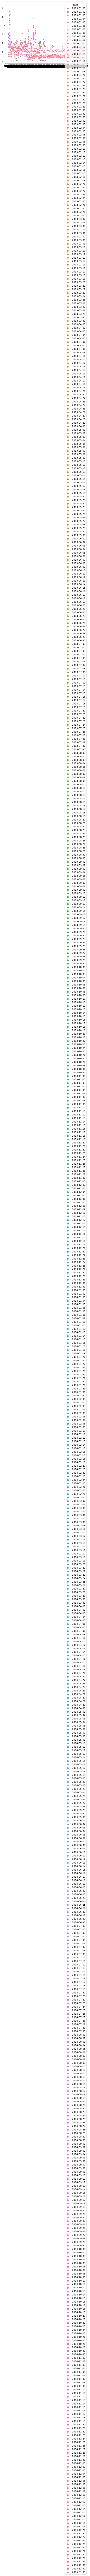

In [45]:
# Sihouette 1

import sklearn.metrics as metrics
import sklearn.cluster as cluster
import seaborn as sns

X = result

for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i, init="k-means++", random_state=123).fit(result).labels_
    print("Sihouette score for k(clusters) = "+str(i)+" is "
          +str(metrics.silhouette_score(X, labels, metric="euclidean", sample_size=1000, random_state=123))) #<---here
        
kmeans = cluster.KMeans(n_clusters=4, init="k-means++")
kmeans = kmeans.fit(result)

labels = kmeans.labels_
print (labels)

sns.scatterplot(data=result)


#### The following cell shows you how to do the following: given a list L, and a list of booleans B (True, False), get the sublist of L that corresponds to the True values in B. For example if L=[1,2,3,4] and B=[False,True,True,False], then the results is [2,3]. This is also helpful for pard (b)

In [46]:
from itertools import compress
L = [1,2,3,4]
B = [False, True, True, False]
list(compress(L, B))

[2, 3]

Continue with your analysis here: